<a href="https://colab.research.google.com/github/pknemi/confidence-interval-on-titanic/blob/main/Confidence_interval_findings_on_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('Titanic_cleaned.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='Fare', ylabel='Density'>

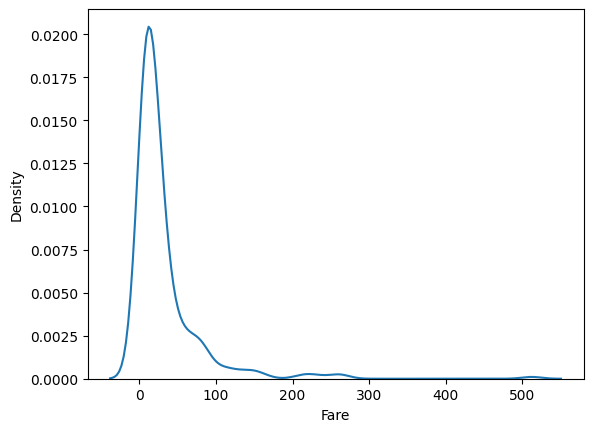

In [ ]:
sns.kdeplot(df['Fare'])

In [ ]:
samples=[]
std=[]
for i in range(10):
    samples.append(df['Fare'].dropna().sample(30).values.tolist())
    std.append(np.std(samples[i]))

In [ ]:
samples=np.array(samples)

In [ ]:
samples

array([[ 15.9   ,  30.0708, 135.6333,  14.4542,  20.25  ,  14.5   ,
          0.    ,  30.    ,   7.8542,  39.6875,   7.55  ,  26.    ,
          7.7417,   8.05  ,   7.8292, 146.5208,  26.2875,   9.5   ,
         29.125 ,  57.    ,  26.    ,  83.1583,  51.4792,  41.5792,
          7.05  ,  61.9792, 106.425 , 135.6333, 120.    ,   8.0292],
       [  6.975 ,   7.75  ,  14.4583,  34.375 ,  27.75  ,   8.3   ,
          7.8958,   9.2167,  10.5   ,  16.1   ,  24.15  , 512.3292,
          7.125 ,  14.4542,   7.775 ,  26.3875,  71.2833,  39.6875,
          8.1375,  38.5   ,   7.8958, 110.8833,  57.9792,   7.8542,
          7.2292,  16.1   ,  13.    ,  26.    ,  26.2875,  27.9   ],
       [ 12.35  ,  91.0792,   7.25  ,  26.2875,  10.4625,   7.125 ,
         13.    ,   7.75  ,   9.5   ,  25.4667,  31.275 ,   8.05  ,
          8.05  ,   6.975 ,   7.925 ,   9.8375,   8.4333,  35.5   ,
          7.8292,  10.5   ,  41.5792,   8.05  , 153.4625,  30.    ,
         50.    ,   7.2292,   7.8875,   7.25  

In [ ]:
std

[16.7981499906286,
 18.26259911069494,
 73.46795335118732,
 37.48055918493035,
 51.062290816817935,
 97.93661164287758,
 56.495031006908626,
 41.202474202841536,
 54.84637992288845,
 91.4093285005454]

In [ ]:
meansamples=np.mean(samples,axis=1)
meansamples

array([42.50958667, 39.80930667, 22.55958667, 44.10583667, 27.22277333,
       22.63889   , 34.41986   , 39.28499667, 28.12097   , 28.46055333])

In [ ]:
meanofmeansamples=np.mean(meansamples)
meanofmeansamples

32.913236

In [ ]:
meanofstd=np.mean(std)
meanofstd

43.462802597211024

In [ ]:
meanofstd/np.sqrt(30)

7.9351857982955325

Taken 95% confidence level


In [ ]:
#alpha=.95
#1-.95=.05
#.05/2=.025
#1-.025=.975

In [ ]:
t_score=2.042

In [ ]:
UPPERLIMIT=meanofmeansamples+t_score*(meanofstd/np.sqrt(30))
UPPERLIMIT

49.11688540011947

In [ ]:
LOWERLIMIT=meanofmeansamples-t_score*(meanofstd/np.sqrt(30))
LOWERLIMIT

16.70958659988052

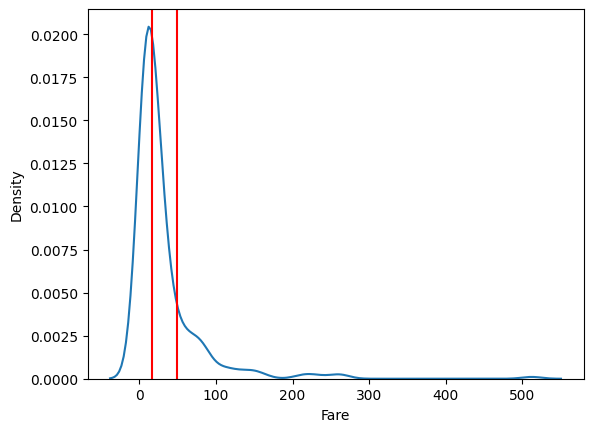

In [ ]:
sns.kdeplot(df['Fare'])
plt.axvline(LOWERLIMIT,color='red')
plt.axvline(UPPERLIMIT,color='red')

**SO, THE 95% OF CONFIDENCE INTERVAL LIE BETWEEN THE RANGE OF 16.70 - 49.11**